# CONTENT BASED BOOK RECOMMENDATION
### Data Science by Digital Talent Scholarship Project 
### Nur'Aini Fii Islahid
### Nur Azizah Agustina




- [Content Based Book Recommender Using Word Frequencies Tfidf](#6)
    - [Books recommendation based on authors name](#7)
    - [Books recommendation based on books tags](#8)
    - [Books recommendation based on author and books tags](#9)
    - [Books recommendation based on title](#10)


In [2]:
import numpy as np 
import pandas as pd 

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

**Load the data from csv files**

In [4]:
books = pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
books.shape

(10000, 23)

In [6]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [7]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [50]:
book_tags = pd.read_csv('book_tags.csv')
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [9]:
tags = pd.read_csv('tags.csv')
tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [48]:
tags_join_DF = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
tags_join_DF.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [11]:
to_read = pd.read_csv('to_read.csv')
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


## Content Based Book Recommender Using Word Frequencies Tfidf

**TfidfVectorizer** function from scikit-learn, which transforms** text to feature vectors** that can be used as input to estimator.


### AUTHOR BASED RECOMMENDATION

In [12]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(3, 3),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books['authors'])

In [13]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

A function that returns the 20 most similar books based on the cosine similarity score.

<AxesSubplot:title={'center':'Trigram disribution for the top 20 words in the book author'}, xlabel='trigram'>

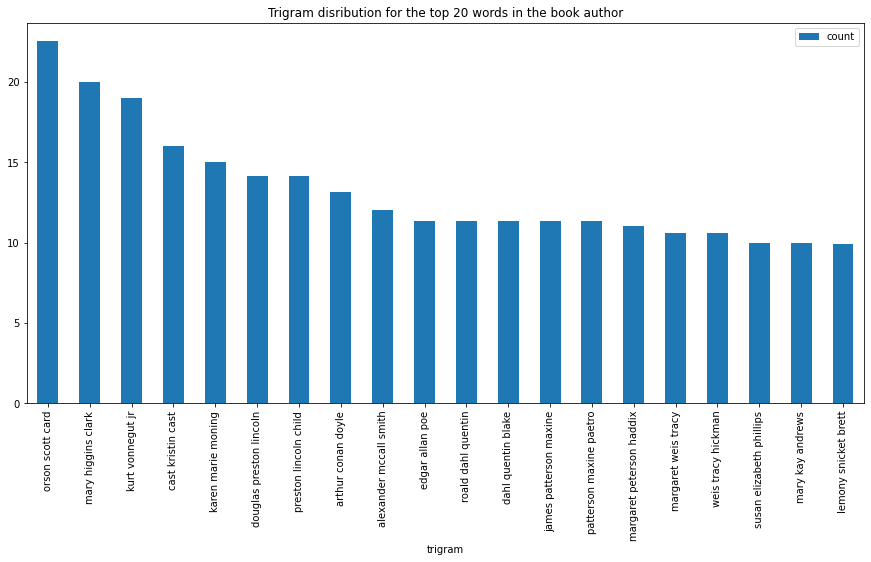

In [14]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(3, 3),min_df=0, stop_words='english')
Tfidf_matrix = tf.fit_transform(books['authors'])
total_words=Tfidf_matrix.sum(axis=0)
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the bigram distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book author", figsize = (15,7), )

In [15]:
# Build a 1-dimensional array with book titles
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

# Function that get book recommendations based on the cosine similarity score of book authors
def authors_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [16]:
authors_recommendations('To Kill a Mockingbird').head(20)

1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (Harr...
18    The Fellowship of the Ring (The Lord of th

### BOOK TAGS BASED RECOMMENDATION

Recommend books using the tags provided to the books.

In [17]:
books_with_tags = pd.merge(books, tags_join_DF, left_on='book_id', right_on='goodreads_book_id', how='inner')

In [18]:
books_with_tags

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_id,count,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,30574,11314,to-read
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11305,10836,fantasy
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11557,50755,favorites
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,8717,35418,currently-reading
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,33114,25968,young-adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999907,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,16529,4,john-keegan
999908,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,32805,3,world-war
999909,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,32156,3,war-ww1
999910,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,8914,20285,3,modern-european-history


In [22]:
tf1 = TfidfVectorizer(analyzer='word',ngram_range=(3, 3),min_df=0, stop_words='english')
tfidf_matrix1 = tf1.fit_transform(books_with_tags['tag_name'].head(10000))
cosine_sim1 = linear_kernel(tfidf_matrix1, tfidf_matrix1)

<AxesSubplot:title={'center':'Trigram disribution for the top 20 words in the book tags'}, xlabel='trigram'>

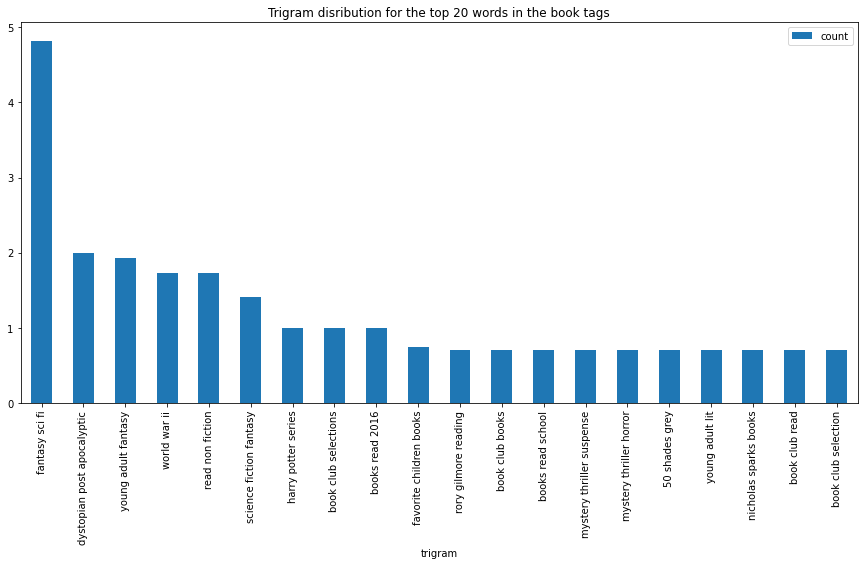

In [23]:
tf1 = TfidfVectorizer(analyzer='word',ngram_range=(3, 3),min_df=0, stop_words='english')
Tfidf_matrix1 = tf1.fit_transform(books_with_tags['tag_name'].head(10000))
total_words1=Tfidf_matrix1.sum(axis=0)
freq1 = [(word, total_words[0, idx]) for word, idx in tf1.vocabulary_.items()]
freq1 =sorted(freq1, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram1 = pd.DataFrame(freq1)
trigram1.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#bigram1
#Taking first 20 records
trigram1 = trigram1.head(20)
#Plotting the bigram distribution
trigram1.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book tags", figsize = (15,7), )

In [24]:
# Build a 1-dimensional array with book titles
titles1 = books['title']
indices1 = pd.Series(books.index, index=books['title'])

# Function that get book recommendations based on the cosine similarity score of books tags
def tags_recommendations(title):
    idx = indices1[title]
    sim_scores = list(enumerate(cosine_sim1[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [25]:
tags_recommendations('To Kill a Mockingbird').head(20)

1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (Harr...
18    The Fellowship of the Ring (The Lord of th

### AUTHOR & TAGS BASED RECOMMENDATION 

Recommendation of books using the authors and tags attributes for better results.


In [26]:
temp_df = books_with_tags.groupby('book_id')['tag_name'].apply(' '.join).reset_index()
temp_df.head()

,book_id,tag_name
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read fantasy favorites currently-reading yo...
2,3,to-read fantasy favorites currently-reading yo...
3,5,to-read fantasy favorites currently-reading yo...
4,6,to-read fantasy young-adult fiction harry-pott...


In [27]:
books = pd.merge(books, temp_df, left_on='book_id', right_on='book_id', how='inner')

In [22]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,to-read fantasy favorites currently-reading yo...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,to-read fantasy favorites currently-reading yo...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,to-read fantasy favorites currently-reading yo...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,to-read favorites currently-reading young-adul...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,to-read favorites currently-reading young-adul...


In [28]:
books['authortags'] = (pd.Series(books[['authors', 'tag_name']]
                .fillna('')
                .values.tolist()
                ).str.join(' '))

In [29]:
tf_authortags = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_authortags = tf_authortags.fit_transform(books['authortags'])
cosine_sim_authortags = linear_kernel(tfidf_matrix_authortags, tfidf_matrix_authortags)

# Build a 1-dimensional array with book titles
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

# Function that get book recommendations based on the cosine similarity score of books tags
def authortags_recommendations(title):
    idx = indices1[title]
    sim_scores = list(enumerate(cosine_sim_authortags[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [30]:
authortags_recommendations('To Kill a Mockingbird')

7                   The Catcher in the Rye
4                         The Great Gatsby
31                         Of Mice and Men
27                       Lord of the Flies
130                    The Grapes of Wrath
129                The Old Man and the Sea
781                          The Awakening
467           Their Eyes Were Watching God
57      The Adventures of Huckleberry Finn
128        One Flew Over the Cuckoo's Nest
714                    Death of a Salesman
13                             Animal Farm
1565                           Ethan Frome
455               A Streetcar Named Desire
137                     The Scarlet Letter
159                     Great Expectations
353                                Beloved
594                       A Separate Peace
1160                           Cannery Row
263                     The Sun Also Rises
Name: title, dtype: object

### TITLE BASED RECOMENDATION

In [31]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(3,3),min_df=0, stop_words='english')
tfidf_matrix2 = tf.fit_transform(books['title'])
cosine_sim2 = linear_kernel(tfidf_matrix2, tfidf_matrix2)
cosine_sim2
# Build a 1-dimensional array with book titles
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

# Function that get book recommendations based on the cosine similarity score of book authors
def title_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]
title_recommendations('To Kill a Mockingbird').head(20)

1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (Harr...
18    The Fellowship of the Ring (The Lord of th

In [32]:
def get_name_from_partial(title):
    return list(books.title[books.title.str.lower().str.contains(title) == True].values)

title = "harry"
l = get_name_from_partial(title)
list(enumerate(l))

title_recommendations(l[1])

1       Harry Potter and the Sorcerer's Stone (Harry P...
20      Harry Potter and the Order of the Phoenix (Har...
22      Harry Potter and the Chamber of Secrets (Harry...
23      Harry Potter and the Goblet of Fire (Harry Pot...
24      Harry Potter and the Deathly Hallows (Harry Po...
26      Harry Potter and the Half-Blood Prince (Harry ...
2100    The Harry Potter Collection 1-4 (Harry Potter,...
3274    Harry Potter Boxed Set, Books 1-5 (Harry Potte...
0                 The Hunger Games (The Hunger Games, #1)
2                                 Twilight (Twilight, #1)
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
5                                  The Fault in Our Stars
6                                              The Hobbit
7                                  The Catcher in the Rye
8                   Angels & Demons  (Robert Langdon, #1)
9                                     Pride and Prejudice
10            

In [35]:
def get_name_from_partial(title):
    return list(books.title[books.title.str.lower().str.contains(title) == True].values)

title = "kill"
l = get_name_from_partial(title)
list(enumerate(l))

title_recommendations(l[1])

1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (Harr...
18    The Fellowship of the Ring (The Lord of th

In [36]:
def get_name_from_partial(title):
    return list(books.title[books.title.str.lower().str.contains(title) == True].values)

title = "bird"
l = get_name_from_partial(title)
list(enumerate(l))

title_recommendations(l[1])

1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (Harr...
18    The Fellowship of the Ring (The Lord of th

In [37]:
temp_df1 = books_with_tags.groupby('authors')['title'].apply(' '.join).reset_index()
temp_df1.head()


,authors,title
0,A. Manette Ansay,Vinegar Hill Vinegar Hill Vinegar Hill Vinegar...
1,A. Meredith Walters,"Bad Rep (Bad Rep, #1) Bad Rep (Bad Rep, #1) Ba..."
2,"A.A. Milne, Ernest H. Shepard","Winnie-the-Pooh (Winnie-the-Pooh, #1) Winnie-t..."
3,A.C. Gaughen,"Scarlet (Scarlet, #1) Scarlet (Scarlet, #1) Sc..."
4,A.G. Howard,"Splintered (Splintered, #1) Splintered (Splint..."


### AUTHOR AND TITLE BASED RECOMMENDATION

In [38]:
books['authortitle'] = (pd.Series(books[['authors', 'title']]
                .fillna('')
                .values.tolist()
                ).str.join(' '))

In [39]:
tf_authortitle = TfidfVectorizer(analyzer='word',ngram_range=(3, 3),min_df=0, stop_words='english')
tfidf_matrix_authortitle= tf_authortitle.fit_transform(books['authortitle'])
cosine_sim_authortitle = linear_kernel(tfidf_matrix_authortitle, tfidf_matrix_authortitle)


In [40]:
# Build a 1-dimensional array with book titles
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

# Function that get book recommendations based on the cosine similarity score of books tags
def authortitle_recommendations(title):
    idx = indices1[title]
    sim_scores = list(enumerate(cosine_sim_authortags[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [41]:
authortitle_recommendations("To Kill a Mockingbird")

7                   The Catcher in the Rye
4                         The Great Gatsby
31                         Of Mice and Men
27                       Lord of the Flies
130                    The Grapes of Wrath
129                The Old Man and the Sea
781                          The Awakening
467           Their Eyes Were Watching God
57      The Adventures of Huckleberry Finn
128        One Flew Over the Cuckoo's Nest
714                    Death of a Salesman
13                             Animal Farm
1565                           Ethan Frome
455               A Streetcar Named Desire
137                     The Scarlet Letter
159                     Great Expectations
353                                Beloved
594                       A Separate Peace
1160                           Cannery Row
263                     The Sun Also Rises
Name: title, dtype: object

In [42]:
print('author_recommendations:')
print(authors_recommendations('To Kill a Mockingbird').head(20), '\n')
print('tag_based recommendations:')
print(tags_recommendations('To Kill a Mockingbird').head(20), '\n')
print('authortags_based recommendations using CountVectorizer:')
print(authortags_recommendations('To Kill a Mockingbird').head(20), '\n')
print('title_recommendations:')
print(title_recommendations('To Kill a Mockingbird').head(20), '\n')
print('author and title_recommendations:')
print(authortitle_recommendations('To Kill a Mockingbird').head(20), '\n')

author_recommendations:
1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (Harr...
18    The Fellowship of 

## CONCLUSSION

Books recommendation based on author,book tags, title give very similar recommendation
